# Explore here

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

In [69]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [70]:
total_data['date'] = pd.to_datetime(total_data['date'], errors='coerce')

if total_data['date'].isnull().any():
    print("Hay valores nulos en la columna 'date' después de la conversión:")
    print(total_data[total_data['date'].isnull()])
else:
    print("No hay valores nulos en la columna 'date' después de la conversión")

total_data = total_data.dropna(subset=['date'])
total_data = total_data.set_index("date")
ts = total_data["sales"]

ts.head()

No hay valores nulos en la columna 'date' después de la conversión


date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

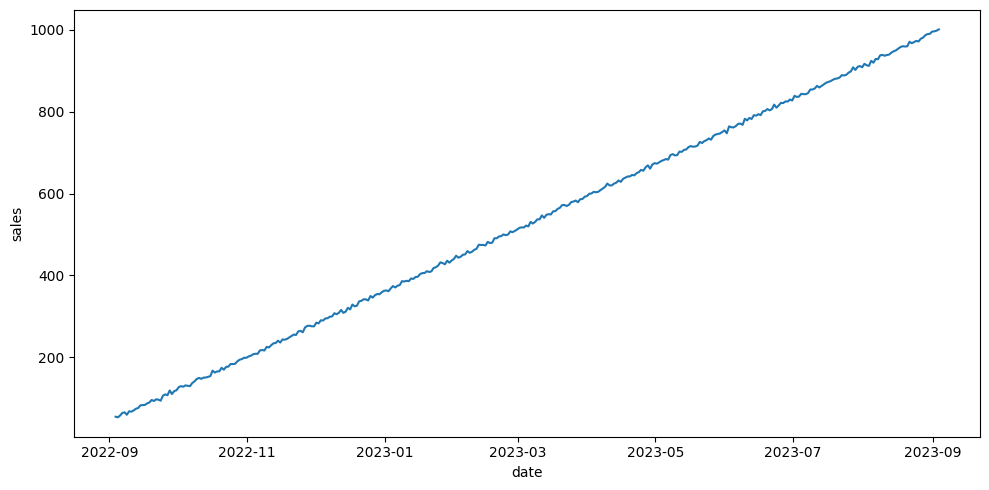

In [71]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

ANALISIS DE UNA SERIE TEMPORAL

In [72]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

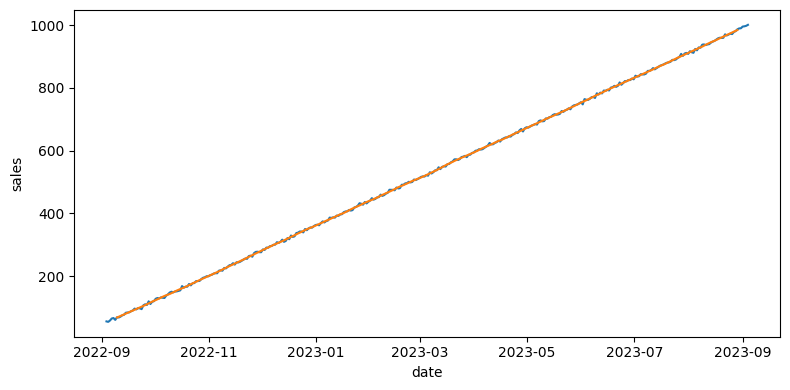

In [73]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

CUAL ES LA TENDENCIA? La tendencia es ascendente.

Análisis de la estacionalidad

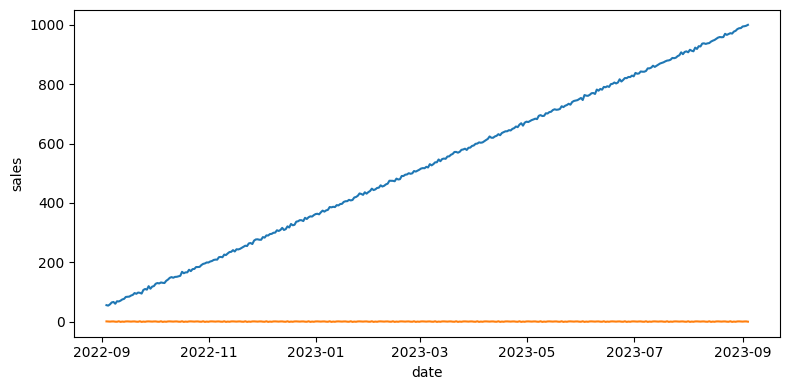

In [74]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

Prueba de Dickey-Fuller

In [75]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [76]:
test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

ES ESTACIONARIA? NO, porque el valor del p-value es de 0.98 con lo cual la hipotesis nula sera rechazada y deducimos que es NO estacionaria.

CONVERTIR EN ESTACIONARIA

Columnas del DataFrame: Index(['date', 'sales'], dtype='object')
No hay valores nulos en la columna 'date' después de la conversión
                                sales
date                                 
2022-09-03 17:10:08.079328  55.292157
2022-09-04 17:10:08.079328  53.803211
2022-09-05 17:10:08.079328  58.141693
2022-09-06 17:10:08.079328  64.530899
2022-09-07 17:10:08.079328  66.013633
Resultados de la prueba de Dickey-Fuller para la serie diferenciada:
Test Statistic: -9.430263118334734
p-value: 5.212954111417252e-16
#Lags Used: 12
Number of Observations Used: 352
Critical Value (1%): -3.4490648539347544
Critical Value (5%): -2.8697861692116478
Critical Value (10%): -2.5711631253228306


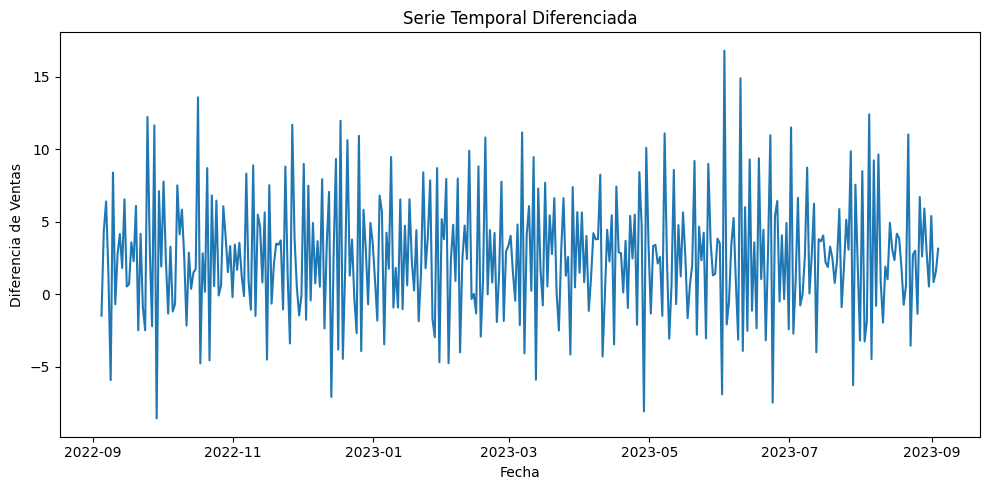

In [77]:
# Cargar el conjunto de datos desde la URL
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

# Mostrar los nombres de las columnas para verificar el nombre correcto
print("Columnas del DataFrame:", total_data.columns)

# Asegurarse de que el nombre de la columna 'date' es correcto
# Supongamos que el nombre correcto de la columna es 'Date'
if 'date' in total_data.columns:
    column_name = 'date'
else:
    # Si no hay una columna llamada 'date', cambiar al nombre correcto
    column_name = 'Date'

# Convertir la columna 'date' (o 'Date') a formato datetime
total_data[column_name] = pd.to_datetime(total_data[column_name], errors='coerce')

# Verificar si hay valores nulos en la columna 'date' después de la conversión
if total_data[column_name].isnull().any():
    print("Hay valores nulos en la columna 'date' después de la conversión:")
    print(total_data[total_data[column_name].isnull()])
else:
    print("No hay valores nulos en la columna 'date' después de la conversión")

# Eliminar filas con valores nulos en 'date' si existen
total_data = total_data.dropna(subset=[column_name])

# Establecer la columna 'date' como índice
total_data = total_data.set_index(column_name)

# Mostrar las primeras filas del DataFrame para verificar
print(total_data.head())

# Extraer la serie temporal de las ventas
ts = total_data["sales"]

# Diferenciar la serie para remover tendencia
total_data['diff_sales'] = ts.diff()

# Eliminar valores nulos después de la diferenciación
total_data = total_data.dropna(subset=['diff_sales'])

# Extraer la serie temporal diferenciada
ts_sales_dif = total_data["diff_sales"]

# Realizar la prueba de Dickey-Fuller en la serie diferenciada
dickey_fuller_result = adfuller(ts_sales_dif)
print("Resultados de la prueba de Dickey-Fuller para la serie diferenciada:")
print(f"Test Statistic: {dickey_fuller_result[0]}")
print(f"p-value: {dickey_fuller_result[1]}")
print(f"#Lags Used: {dickey_fuller_result[2]}")
print(f"Number of Observations Used: {dickey_fuller_result[3]}")
for key, value in dickey_fuller_result[4].items():
    print(f"Critical Value ({key}): {value}")

# Graficar la serie temporal diferenciada
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=ts_sales_dif, ax=axis)
plt.title("Serie Temporal Diferenciada")
plt.xlabel("Fecha")
plt.ylabel("Diferencia de Ventas")
plt.tight_layout()
plt.show()


No consegui que el p-value estuviera entorno al 0.05 con lo cual concluyo que NO ES ESTACIONARIA.

Análisis de la variabilidad

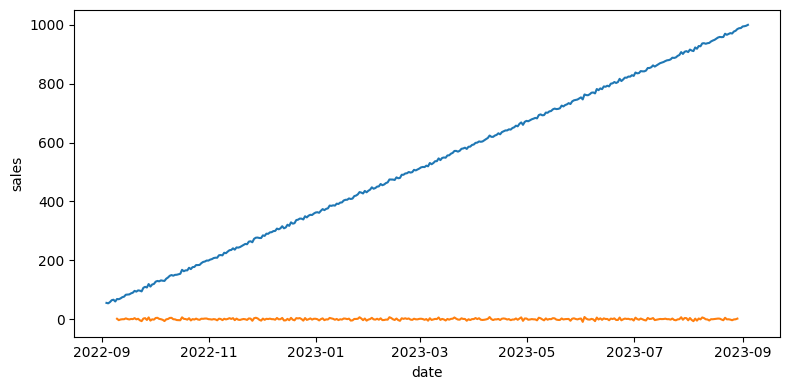

In [78]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

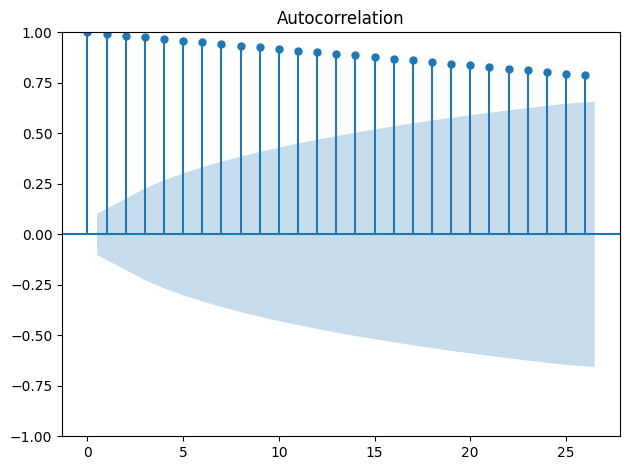

In [79]:
# cada lag es un mes
plot_acf(ts)

plt.tight_layout()

plt.show()

Se pierde correlacion lo cual es muy dificil conocer la capacidad predictiva del modelo.

In [80]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [81]:
model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.098, Time=1.72 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.82 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.048, Time=0.43 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.31 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.46 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.436, Time=1.12 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.03 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.17 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Thu, 25 Jul 2024   AIC                           1839.553
Time:                        13:33:40   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

PREDICCION DEL MODELO

In [83]:
forecast = model.predict(60)
forecast

2023-09-04 17:10:08.079328    1.675366
2023-09-05 17:10:08.079328    2.673520
2023-09-06 17:10:08.079328    2.591621
2023-09-07 17:10:08.079328    2.598341
2023-09-08 17:10:08.079328    2.597789
2023-09-09 17:10:08.079328    2.597834
2023-09-10 17:10:08.079328    2.597831
2023-09-11 17:10:08.079328    2.597831
2023-09-12 17:10:08.079328    2.597831
2023-09-13 17:10:08.079328    2.597831
2023-09-14 17:10:08.079328    2.597831
2023-09-15 17:10:08.079328    2.597831
2023-09-16 17:10:08.079328    2.597831
2023-09-17 17:10:08.079328    2.597831
2023-09-18 17:10:08.079328    2.597831
2023-09-19 17:10:08.079328    2.597831
2023-09-20 17:10:08.079328    2.597831
2023-09-21 17:10:08.079328    2.597831
2023-09-22 17:10:08.079328    2.597831
2023-09-23 17:10:08.079328    2.597831
2023-09-24 17:10:08.079328    2.597831
2023-09-25 17:10:08.079328    2.597831
2023-09-26 17:10:08.079328    2.597831
2023-09-27 17:10:08.079328    2.597831
2023-09-28 17:10:08.079328    2.597831
2023-09-29 17:10:08.07932

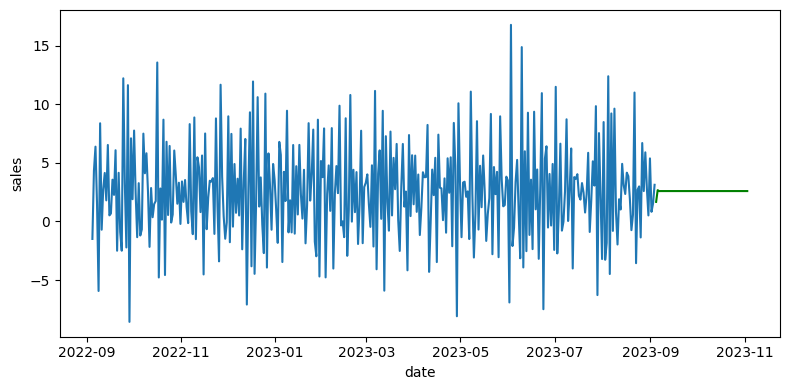

In [84]:
fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()